

# **Exercises on Supervised Machine Learning - Regressions in Practice**


**Exercise 1: Real Estate Price Prediction (Regression)**

In [40]:
#Import all required Lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [31]:
#1. Data Loading & Exploration
data = pd.read_csv('/content/Extended_Housing_Dataset.csv')

In [33]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9423388.0,1197.0,3,3,2,no,yes,no,yes,yes,1,no,unfurnished
1,9550634.0,1670.0,3,3,2,no,no,no,no,yes,0,no,furnished
2,7304572.0,1192.0,4,2,2,no,yes,no,yes,no,2,yes,furnished
3,5234489.0,1006.0,4,3,2,no,yes,yes,yes,no,0,no,furnished
4,10204212.0,1838.0,3,2,1,yes,no,yes,yes,yes,1,yes,furnished


In [34]:
data.shape

(500, 13)

In [35]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             500 non-null    float64
 1   area              500 non-null    float64
 2   bedrooms          500 non-null    int64  
 3   bathrooms         500 non-null    int64  
 4   stories           500 non-null    int64  
 5   mainroad          500 non-null    object 
 6   guestroom         500 non-null    object 
 7   basement          500 non-null    object 
 8   hotwaterheating   500 non-null    object 
 9   airconditioning   500 non-null    object 
 10  parking           500 non-null    int64  
 11  prefarea          500 non-null    object 
 12  furnishingstatus  500 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 50.9+ KB


In [37]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,500.000000
mean,9.331668e+06,2667.881568,3.746000,1.214000,2.806000,1.088000
std,1.590999e+06,398.112986,1.021553,0.893196,0.917632,0.897701
min,3.048984e+06,801.000000,1.000000,0.000000,1.000000,0.000000
25%,9.323585e+06,2722.435851,3.000000,1.000000,2.000000,0.000000
50%,9.758238e+06,2775.342204,4.000000,1.000000,3.000000,1.000000
75%,1.017175e+07,2818.444877,4.000000,2.000000,4.000000,2.000000
max,1.191679e+07,3493.000000,5.000000,3.000000,4.000000,3.000000


1. As we seen above the count is 500 for all columns which indicates that there is no missing values.
2. The min and max values of price and area looks reasonable although max values are considerably higher than 75th percentile which might indicate some higher-end properties or potential outliers.
3. The max values of bedrooms:5, bathrooms:3, stories:4, parking:3 appear within expected ranges and don't indicate any outliers or data errors.
However , further visual exploration would be beneficial to confirm above observations and gain deeper understanding of the data distribution and potential outliers.

In [39]:
#2. Data Cleaning & Preprocessing
# Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

# Find duplicate rows
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Duplicate Rows:
Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


No Null and No duplicate rows.

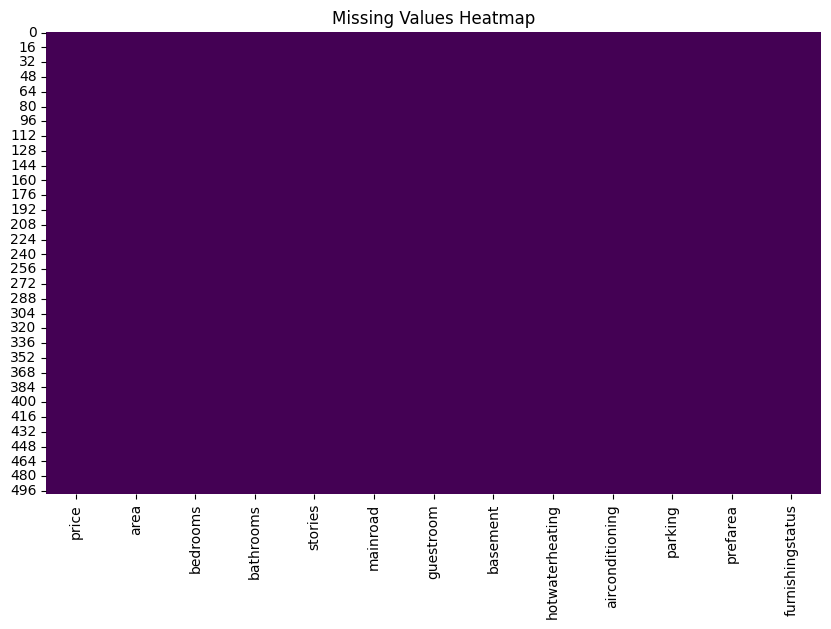

In [41]:
# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Above heatmap shows no missing values

In [42]:
# Categorical Variables Summary
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n Value counts for {col}:\n", data[col].value_counts())


 Value counts for mainroad:
 mainroad
yes    265
no     235
Name: count, dtype: int64

 Value counts for guestroom:
 guestroom
yes    257
no     243
Name: count, dtype: int64

 Value counts for basement:
 basement
no     262
yes    238
Name: count, dtype: int64

 Value counts for hotwaterheating:
 hotwaterheating
yes    270
no     230
Name: count, dtype: int64

 Value counts for airconditioning:
 airconditioning
no     256
yes    244
Name: count, dtype: int64

 Value counts for prefarea:
 prefarea
yes    254
no     246
Name: count, dtype: int64

 Value counts for furnishingstatus:
 furnishingstatus
furnished         185
semi-furnished    160
unfurnished       155
Name: count, dtype: int64


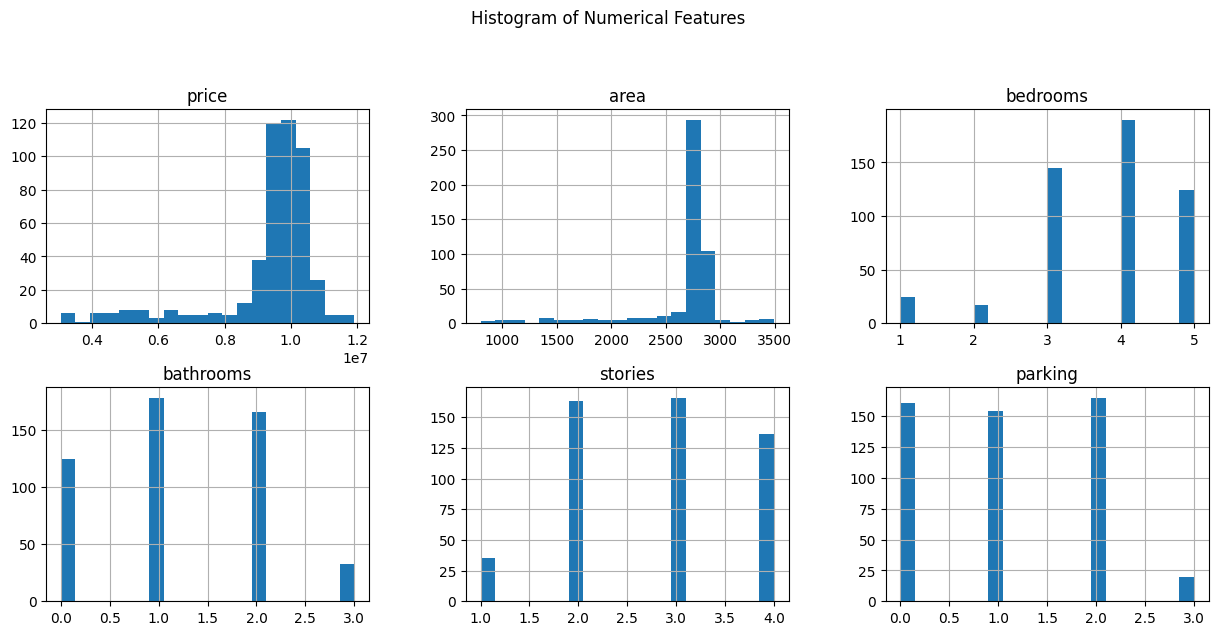

In [43]:
# Numerical Variables Summary
num_cols = data.select_dtypes(include=np.number).columns
data[num_cols].hist(bins=20, figsize=(15, 10), layout=(len(num_cols) // 3 + 1, 3))
plt.suptitle("Histogram of Numerical Features")
plt.show()

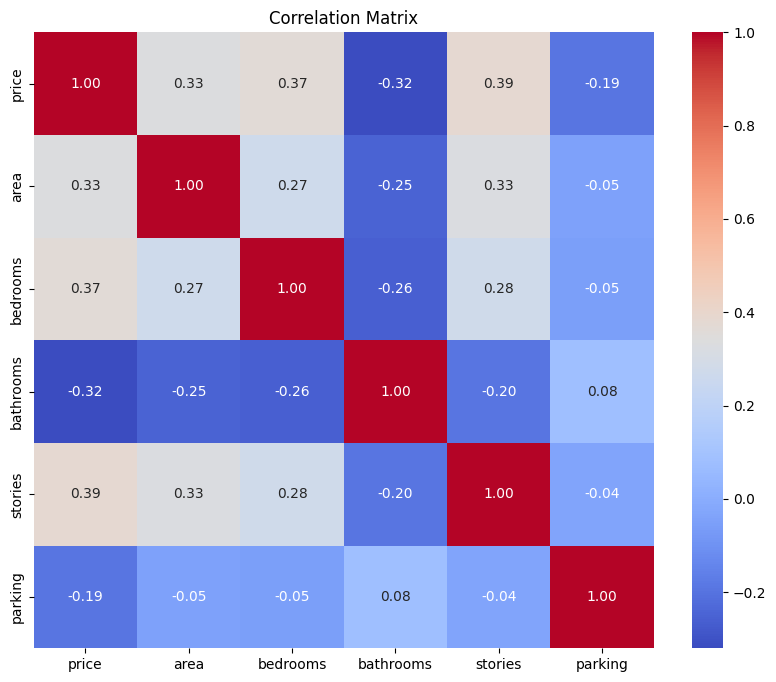

In [44]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

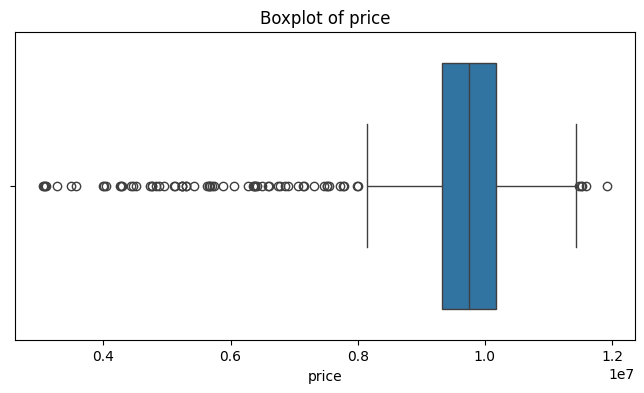

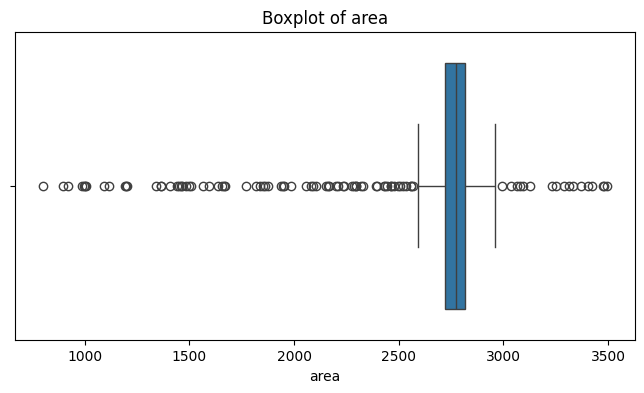

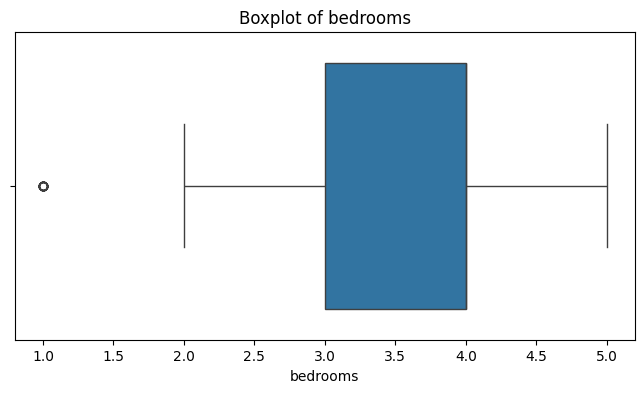

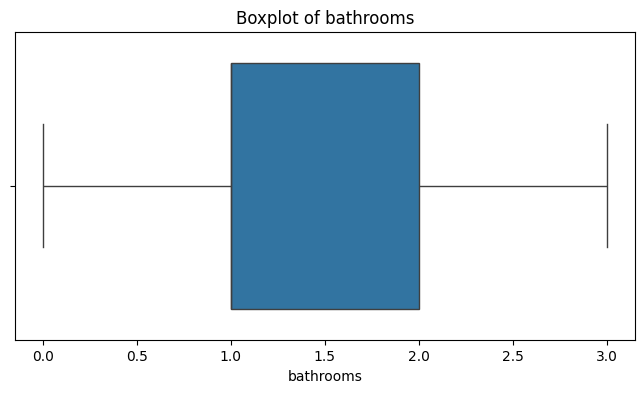

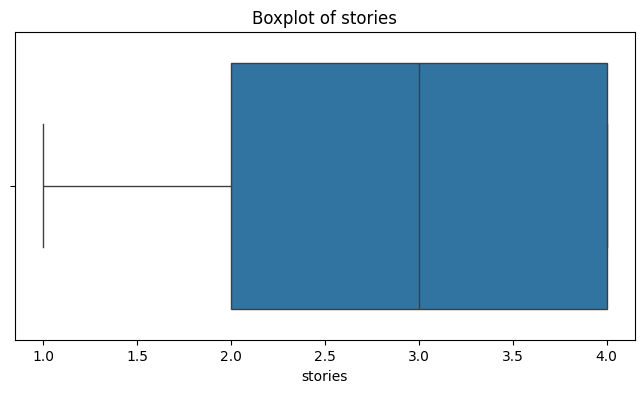

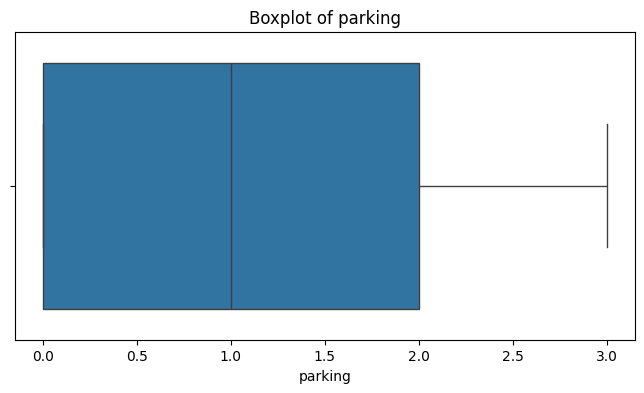

In [45]:
# Boxplots for Outlier Detection
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

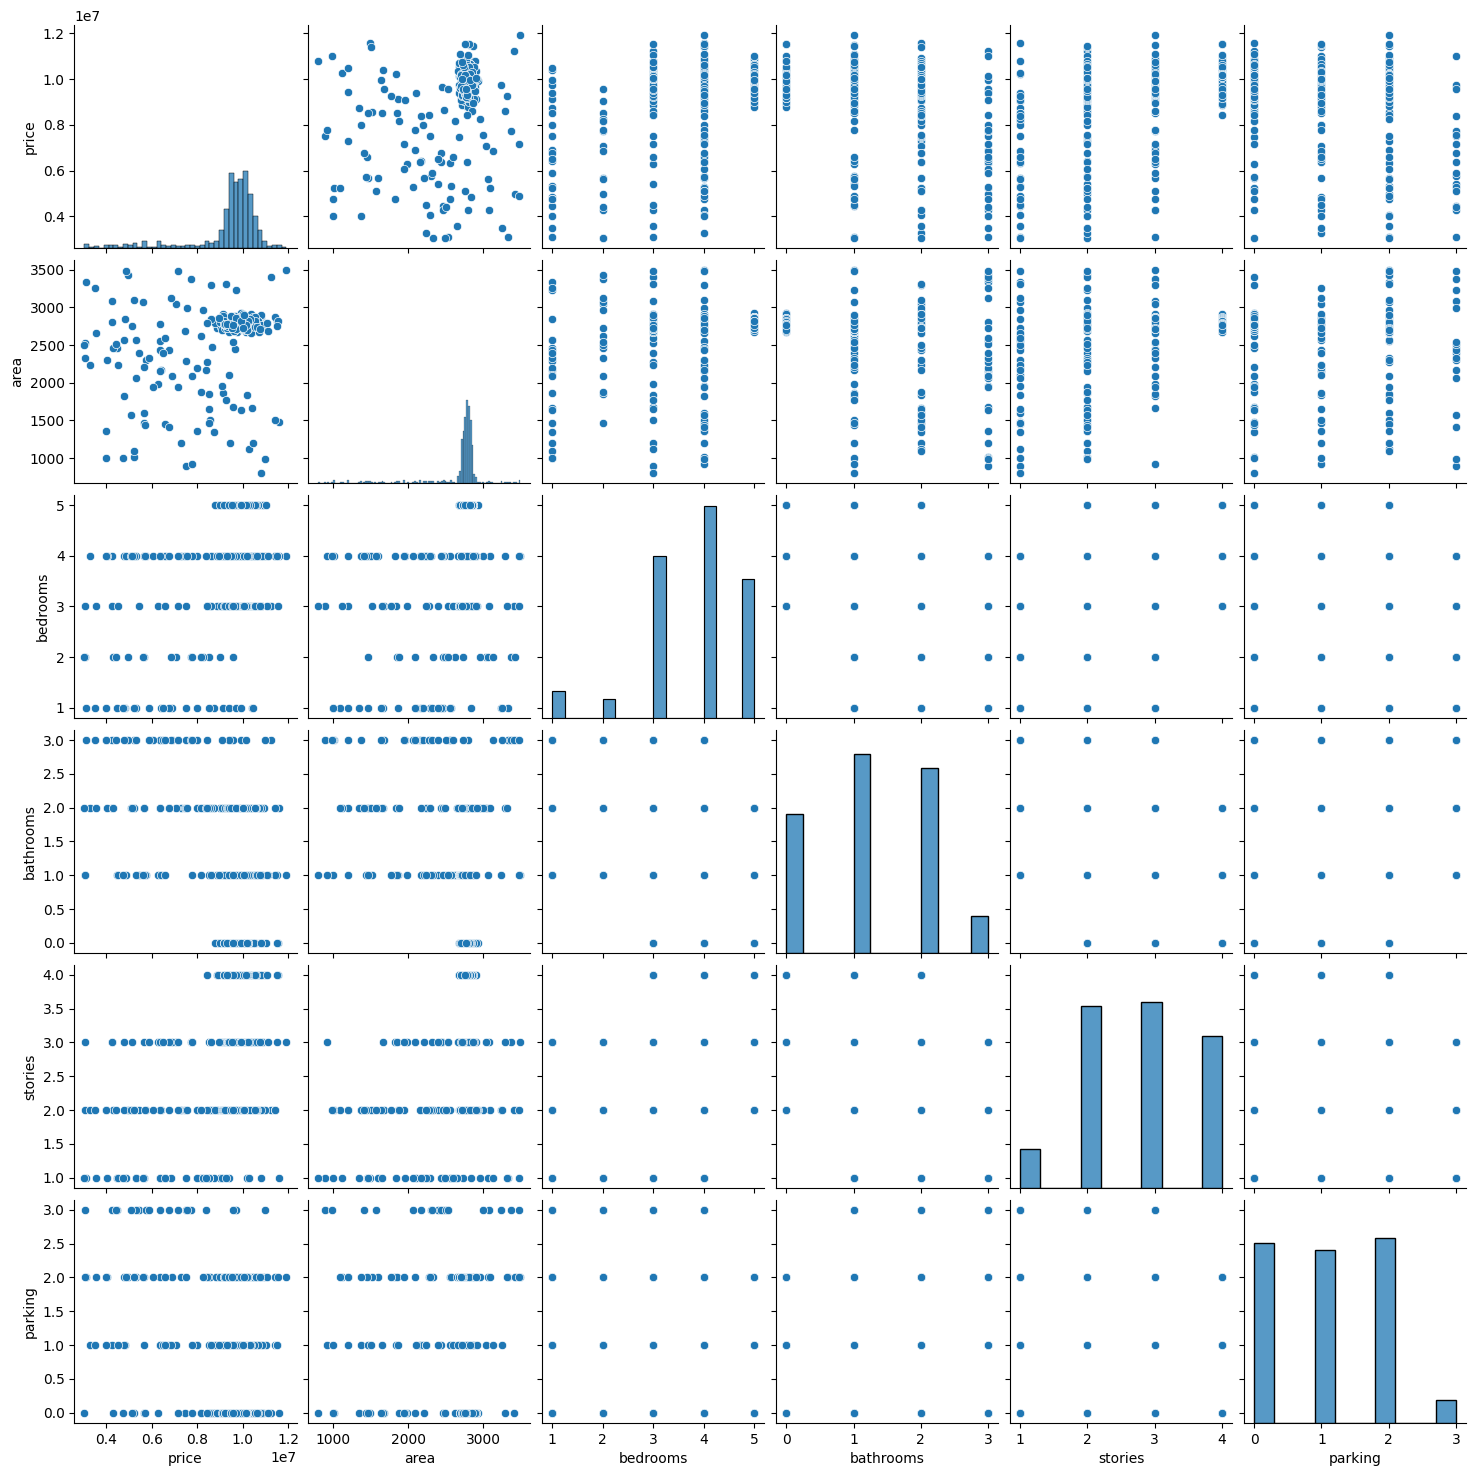

In [46]:
# Pairplot
sns.pairplot(data[num_cols])
plt.show()

In [12]:
encoder=LabelEncoder()

In [13]:
#Label encoding for all columns with yes/no boolean values.
column_to_encode = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [14]:
data[column_to_encode]=data[column_to_encode].apply(encoder.fit_transform)

In [15]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,9.423388e+06,1197.000000,3,3,2,0,1,0,1,1,1,0,unfurnished
1,9.550634e+06,1670.000000,3,3,2,0,0,0,0,1,0,0,furnished
2,7.304572e+06,1192.000000,4,2,2,0,1,0,1,0,2,1,furnished
3,5.234489e+06,1006.000000,4,3,2,0,1,1,1,0,0,0,furnished
4,1.020421e+07,1838.000000,3,2,1,1,0,1,1,1,1,1,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.016206e+07,2759.160686,5,1,4,1,1,0,1,0,0,1,furnished
496,1.000504e+07,2915.523589,3,2,2,0,0,0,0,0,1,1,unfurnished
497,9.940223e+06,2821.337587,5,1,2,1,1,0,0,1,1,1,semi-furnished
498,1.001576e+07,2721.276149,3,2,2,0,1,1,1,0,1,1,unfurnished


In [17]:
#one-hot encoding for furnishingstatus
data=pd.get_dummies(data,columns=['furnishingstatus'])

In [18]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9.423388e+06,1197.000000,3,3,2,0,1,0,1,1,1,0,False,False,True
1,9.550634e+06,1670.000000,3,3,2,0,0,0,0,1,0,0,True,False,False
2,7.304572e+06,1192.000000,4,2,2,0,1,0,1,0,2,1,True,False,False
3,5.234489e+06,1006.000000,4,3,2,0,1,1,1,0,0,0,True,False,False
4,1.020421e+07,1838.000000,3,2,1,1,0,1,1,1,1,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.016206e+07,2759.160686,5,1,4,1,1,0,1,0,0,1,True,False,False
496,1.000504e+07,2915.523589,3,2,2,0,0,0,0,0,1,1,False,False,True
497,9.940223e+06,2821.337587,5,1,2,1,1,0,0,1,1,1,False,True,False
498,1.001576e+07,2721.276149,3,2,2,0,1,1,1,0,1,1,False,False,True


In [19]:
#Split the data into Dependent and Independent column
X=data.drop('price',axis=1) # Independent variable
y=data['price'] #Dependent variable

In [21]:
#3. Model Training
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
model=LinearRegression()
model.fit(X_train,y_train) # from all the independent values or data my model gets trained
#i.e. machine learning has been done

LinearRegression()

In [23]:
y_pred=model.predict(X_test)

In [24]:
y_pred #Predicted

array([ 9378827.22625636,  8201843.10750391, 10279666.16348239,
        9450320.22759669,  9890557.01415103, 10538923.10660068,
       10141201.80060698, 10484121.24751427,  7819933.84849002,
        9686949.81574046,  8897828.22966006,  9021900.31526009,
       10069246.75740055,  7948650.11332606,  9905317.73072375,
        9564337.54055014, 10610905.95827093,  9388300.75149192,
        9584650.65479254, 10276492.50560213,  9996124.12146818,
        9618458.4284708 , 10278665.96832818,  9255873.12262724,
        7794104.90280838,  9346380.8927122 ,  9858711.63718517,
        9339404.65586233,  9862423.45094916,  9638164.20745366,
        9487020.66504634,  9160898.16607256, 10084218.30161078,
        9853508.2265131 ,  7792894.92617794,  9696556.97190853,
       10278405.17326165,  7921118.83018595, 10537119.389298  ,
        8027902.77836839,  9227306.54665053,  8273985.61397856,
       10359556.77609935, 10188309.56187394,  8234129.97044612,
        8703483.24286837,  7387880.30796

In [25]:
y_test #Actual

,price
361,9.646429e+06
73,9.080526e+06
374,1.014337e+07
155,1.005431e+07
104,9.542410e+06
...,...
347,1.017585e+07
86,6.853339e+06
75,4.425472e+06
438,1.030960e+07


In [26]:
y_test.head()

,price
361,9.646429e+06
73,9.080526e+06
374,1.014337e+07
155,1.005431e+07
104,9.542410e+06


In [28]:
#4. Model Evaluation & Interpretation
# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R2 Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 1046889.8785650139
Root Mean Squared Error (RMSE): 1585891.1835565395
R-squared (R2) Score: 0.2825131866007221


Interpret the metrics:
1.Mean Absolute Error(MAE) is approx  1046889.88 which signifies that on avg our model's predictions for house price are off by about    $1,046,890.

2. RMSE value is approx 1585891.18 which signifies typical magnitude of the prediction errors. A higher RMSE indicates larger errors, particularly sensitive to larger errors due to squaring.

3. R2 Score approx 0.2825 shows about 28.25% of the variance in the house prices.

So, an average error (MAE) of around $1,046,890   and  a  typical  error magnitude  (RMSE) of around $1,585,891 seem quite high relative to the average house price (mean value of house prices calculated above) of roughly $9.3 million.
The MAE is about 11.2% of the average price (i.e., $9.3 million or $9,331,668 and  $1,046,890 / $9,331,668 * 100 = 11.2% ), and the RMSE is about 17% of the average price ($1,585,891 / $9,331,668 * 100 = 16.99% i.e. 17% ).
While an 11-17% error might be acceptable for a first model, there is definitely room for improvement.

In [29]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients with their corresponding feature names
feature_names = X_train.columns
print("Model Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

print(f"\nModel Intercept: {intercept}")

Model Coefficients:
area: 615.3614704132775
bedrooms: 291108.49313911074
bathrooms: -263916.2720270324
stories: 380985.7514277673
mainroad: 54023.82555244605
guestroom: -80016.71670773305
basement: -110412.8714807045
hotwaterheating: -197316.46909309813
airconditioning: 154249.92290505342
parking: -241310.31710657082
prefarea: 181283.75385797195
furnishingstatus_furnished: 68694.43617476655
furnishingstatus_semi-furnished: -70045.72579247365
furnishingstatus_unfurnished: 1351.2896177072994

Model Intercept: 6170786.752068636


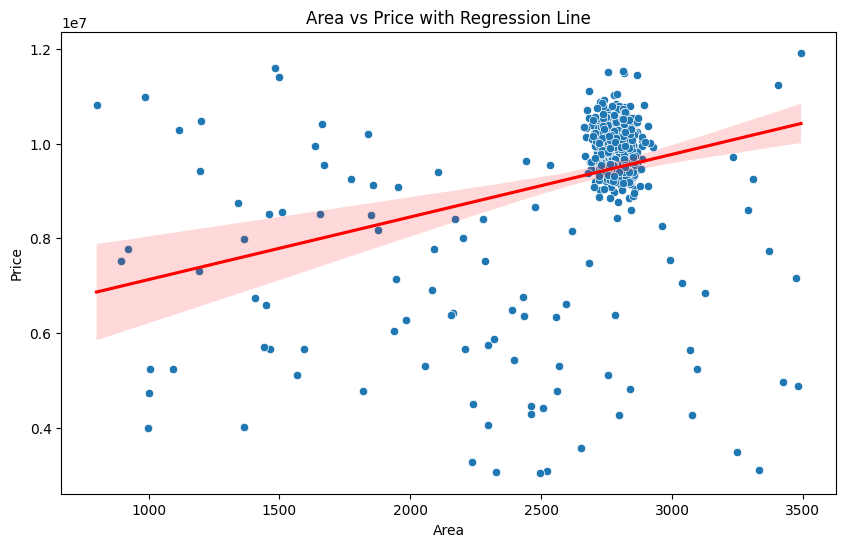

In [51]:
#Scatter plot Area vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data)
sns.regplot(x='area', y='price', data=data, scatter=False, color='red') # Add regression line
plt.title('Area vs Price with Regression Line')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

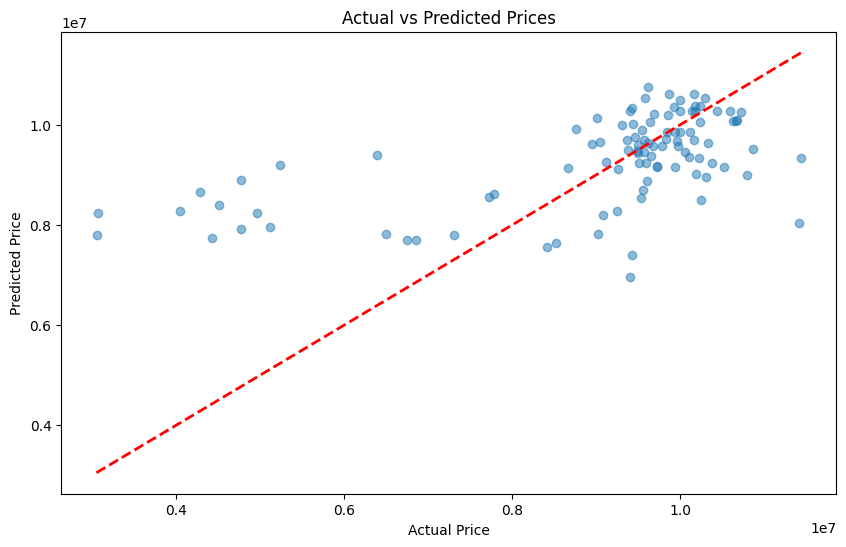

In [52]:
#Scatter plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

**Summary:**

According to the linear regression model, the most influential factors impacting house prices appear to be stories and bedrooms, both having positive coefficients indicating that more stories and bedrooms are associated with higher prices, which is intuitive.

Conversely, parking and bathrooms have notable negative coefficients, which is somewhat counter-intuitive for bathrooms and might warrant further investigation.

The model's performance, as indicated by the R-squared score of approximately 0.28, is relatively low, explaining only a small portion of the variability in house prices. The MAE and RMSE values, which are significant relative to the average house price, suggest that the model's predictions have a considerable average error. Given these metrics, the model's accuracy is likely not sufficient for practical use where precise price estimations are needed. The model might be making errors due to missing important features not present in the dataset, non-linear relationships between features and price that a linear model cannot capture, or potential outliers in the data. A surprise might be the negative coefficient for bathrooms, as typically more bathrooms are associated with higher prices. This could indicate interactions with other features or a peculiarity in this specific dataset.